# Quantile MLPRegressor

[scikit-learn](http://scikit-learn.org/stable/) does not have a quantile regression for multi-layer perceptron. [mlinsights](http://www.xavierdupre.fr/app/mlinsights/helpsphinx/index.html) implements a version of it based on the *scikit-learn* model. The implementation overwrites method ``_backprop``.

In [1]:
%matplotlib inline

We generate some dummy data.

In [2]:
import numpy
X = numpy.random.random(1000)
eps1 = (numpy.random.random(900) - 0.5) * 0.1
eps2 = (numpy.random.random(100)) * 10
eps = numpy.hstack([eps1, eps2])
X = X.reshape((1000, 1))
Y = X.ravel() * 3.4 + 5.6 + eps

In [3]:
from sklearn.neural_network import MLPRegressor
clr = MLPRegressor(hidden_layer_sizes=(30,), activation='tanh')
clr.fit(X, Y)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [4]:
from mlinsights.mlmodel import QuantileMLPRegressor
clq = QuantileMLPRegressor(hidden_layer_sizes=(30,), activation='tanh')
clq.fit(X, Y)

QuantileMLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto',
           beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
           hidden_layer_sizes=(30,), learning_rate='constant',
           learning_rate_init=0.001, max_iter=200, momentum=0.9,
           n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
           random_state=None, shuffle=True, solver='adam', tol=0.0001,
           validation_fraction=0.1, verbose=False, warm_start=False)

In [5]:
from pandas import DataFrame
data= dict(X=X.ravel(), Y=Y, clr=clr.predict(X), clq=clq.predict(X))
df = DataFrame(data)
df.head()

,X,Y,clr,clq
0,0.720940,8.026140,8.590080,8.069931
1,0.406133,6.937675,7.599968,7.051029
2,0.088842,5.868685,6.428689,5.843513
3,0.962570,8.914009,9.236383,8.731924
4,0.904481,8.693848,9.089638,8.581862


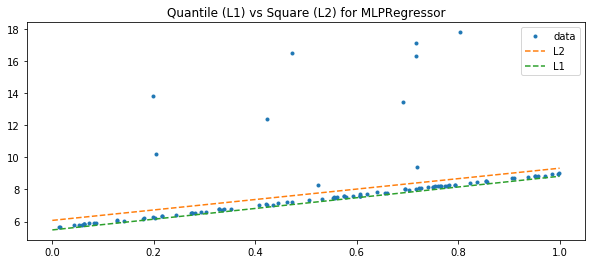

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
choice = numpy.random.choice(X.shape[0]-1, size=100)
xx = X.ravel()[choice]
yy = Y[choice]
ax.plot(xx, yy, '.', label="data")
xx = numpy.array([[0], [1]])
y1 = clr.predict(xx)
y2 = clq.predict(xx)
ax.plot(xx, y1, "--", label="L2")
ax.plot(xx, y2, "--", label="L1")
ax.set_title("Quantile (L1) vs Square (L2) for MLPRegressor")
ax.legend();